# Načtení dat

In [1]:
import pandas as pd

# načtení datasetu
df = pd.read_excel("data/dataset_ml.xlsx")

print(df.head(10))

               kraj      datum   cena
0             praha 2019-03-31  73818
1             praha 2019-06-30  75162
2             praha 2019-09-30  77202
3             praha 2019-12-31  79382
4  stredocesky_kraj 2019-03-31  28777
5  stredocesky_kraj 2019-06-30  31328
6  stredocesky_kraj 2019-09-30  31846
7  stredocesky_kraj 2019-12-31  32882
8    jihocesky_kraj 2019-03-31  26028
9    jihocesky_kraj 2019-06-30  26896


# Trénování dat

In [2]:
from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression

models = [LinearRegression()]

# vytvoření modelu
fcst = MLForecast(
    models=models,
    freq='QE',
    lags=[1, 4]
)

# natrénování modelu
fcst.fit(
    df,
    id_col='kraj',
    time_col='datum',
    target_col='cena'
)


MLForecast(models=[LinearRegression], freq=QE, lag_features=['lag1', 'lag4'], date_features=[], num_threads=1)

# Predikce

In [3]:
# predikce 2 roky dopředu
preds = fcst.predict(h=8)

preds.head(10)

,kraj,datum,LinearRegression
0,jihocesky_kraj,2025-03-31,50526.867188
1,jihocesky_kraj,2025-06-30,51261.597656
2,jihocesky_kraj,2025-09-30,52028.816406
3,jihocesky_kraj,2025-12-31,52966.281250
4,jihocesky_kraj,2026-03-31,53937.253906
5,jihocesky_kraj,2026-06-30,54936.890625
6,jihocesky_kraj,2026-09-30,55964.484375
7,jihocesky_kraj,2026-12-31,56999.378906
8,jihomoravsky_kraj,2025-03-31,74260.531250
9,jihomoravsky_kraj,2025-06-30,75157.281250


# Vykreslení v grafu

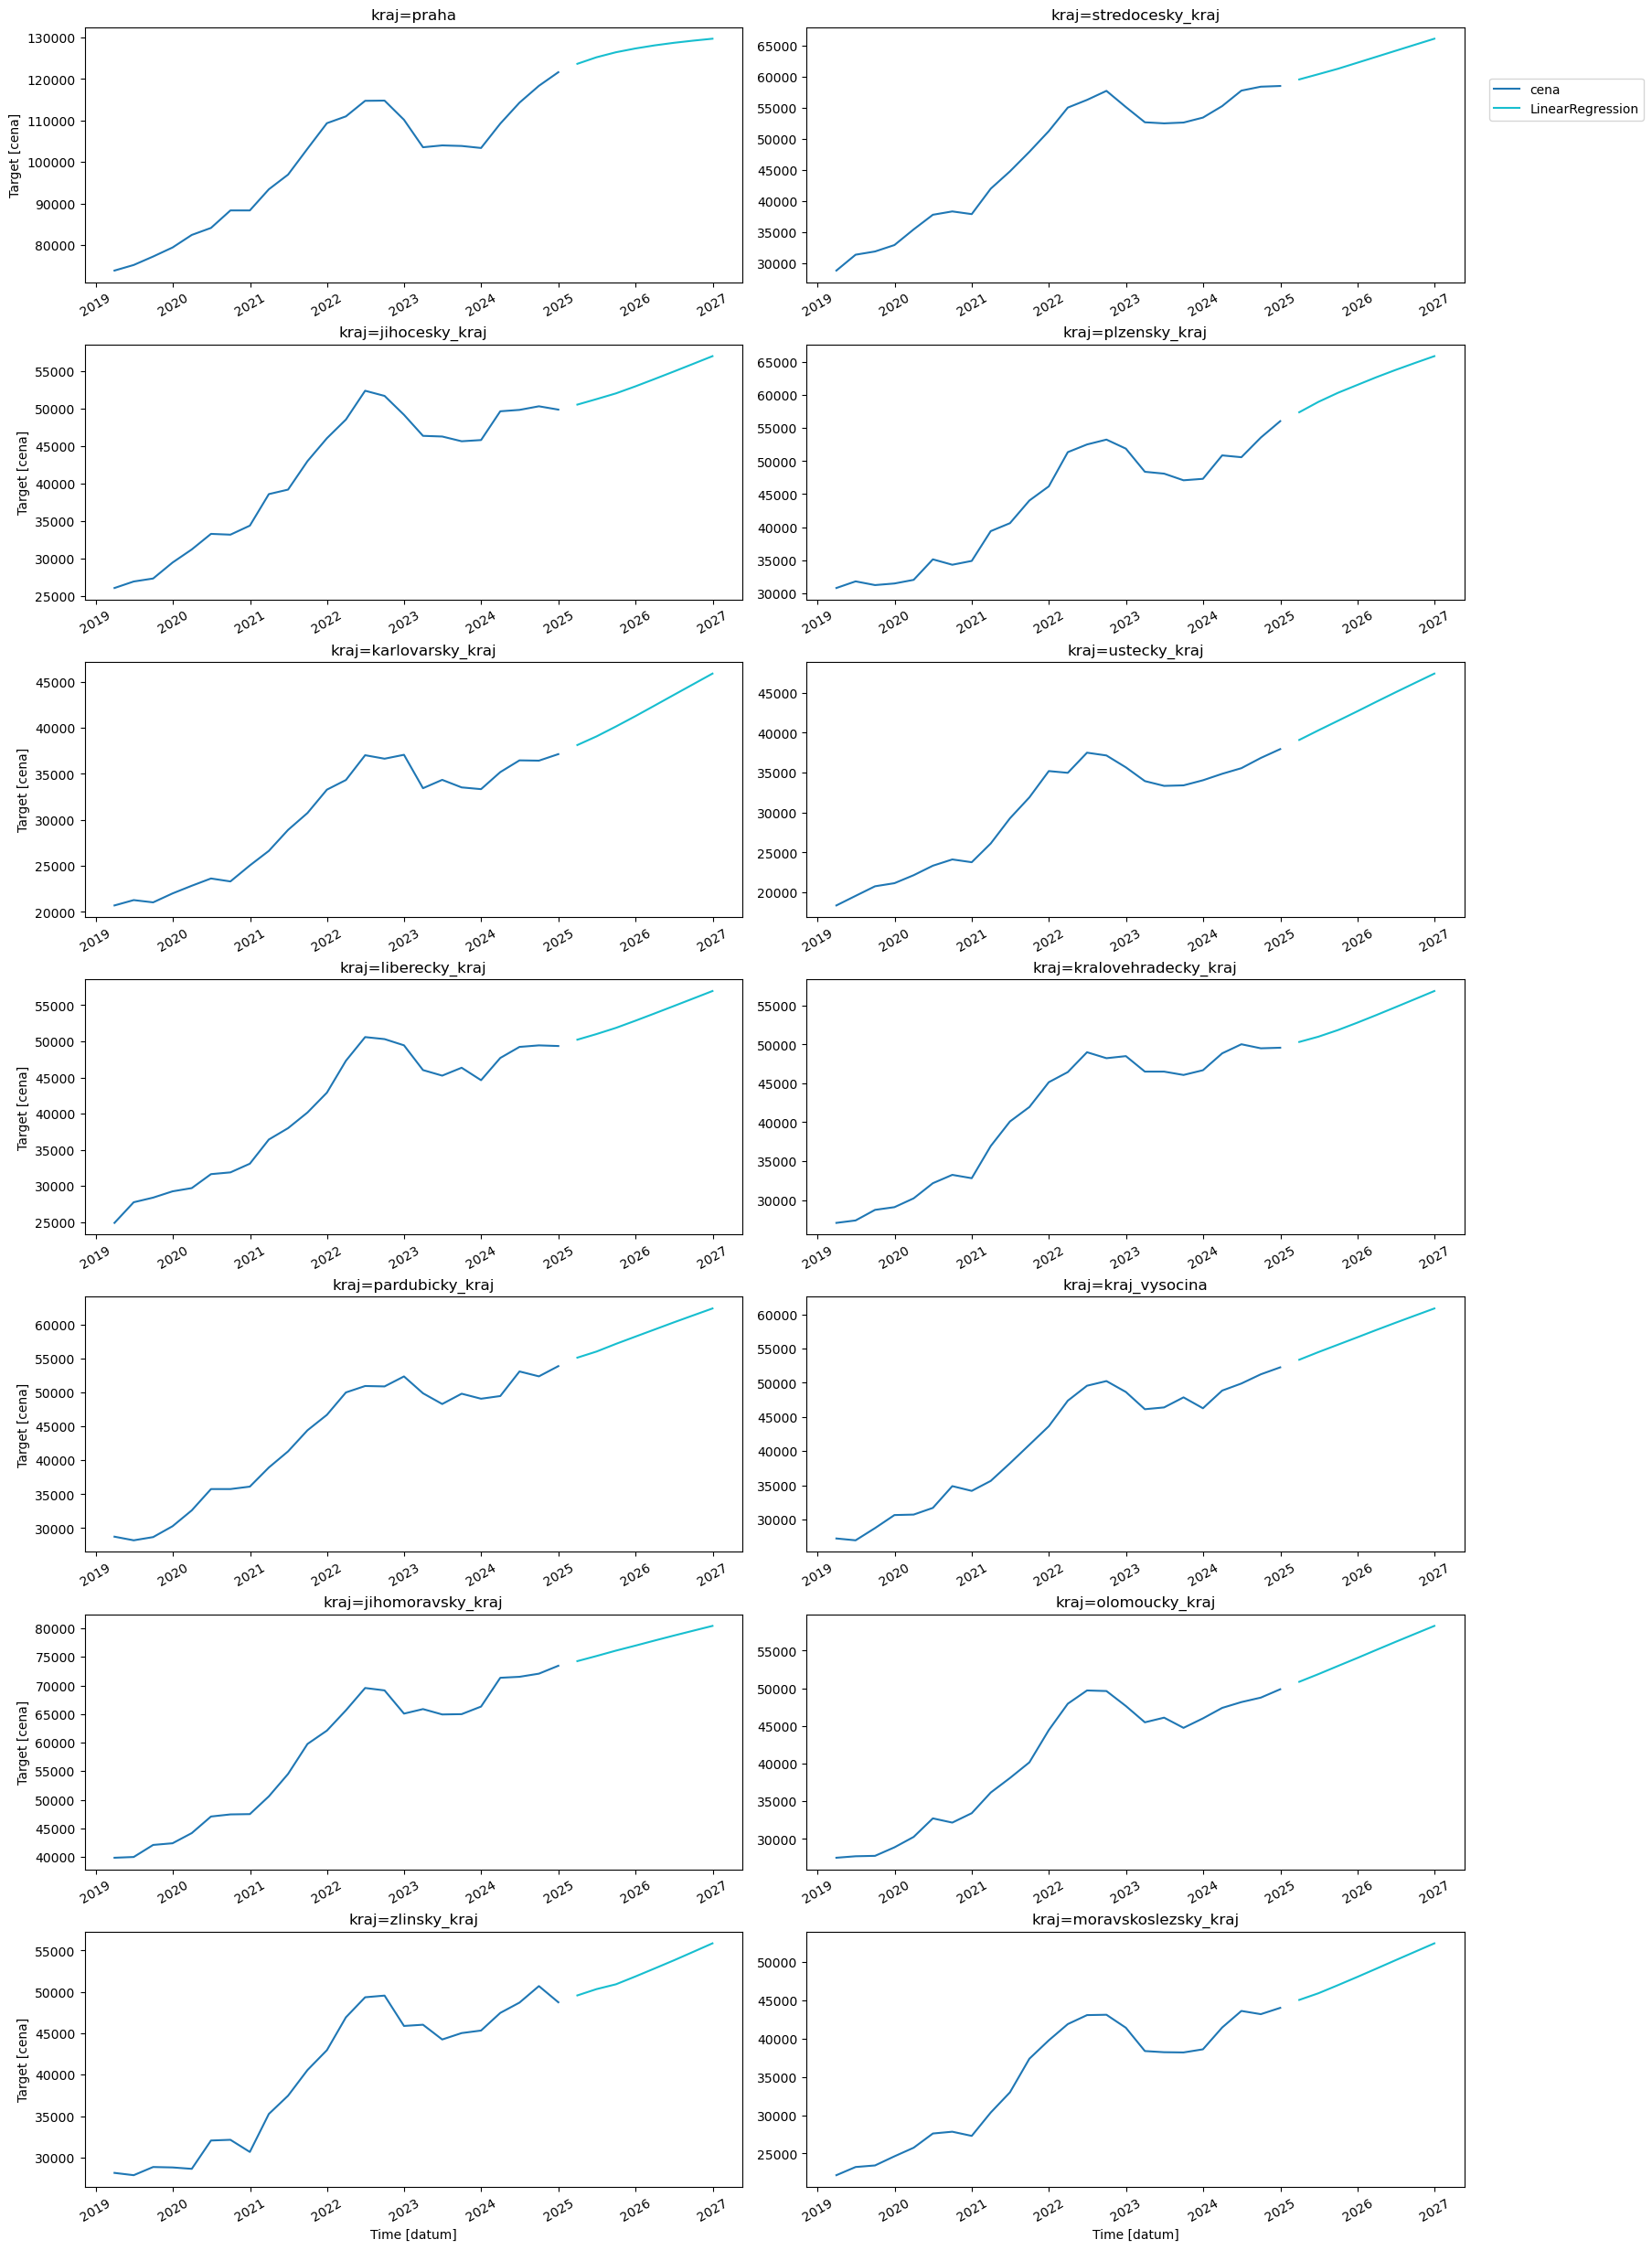

In [4]:
from utilsforecast.plotting import plot_series

plot_series(
    df=df,
    forecasts_df=preds,
    id_col='kraj',
    time_col='datum',
    target_col='cena',
    max_ids=14
)